In [72]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
path = "/media/anmol/Study/GITHUB/Workshop_NIT_Meghalaya/Datasets/Mall_Customers.csv"

In [73]:
data = pd.read_csv(path, index_col='CustomerID')
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [74]:
data.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [76]:
data.drop_duplicates(inplace = True)

In [77]:
X = data.iloc[:,2:]
X.head()

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


In [78]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    teacher = KMeans(n_clusters= i, init = 'k-means++', random_state=42)
    teacher.fit(X)
    wcss.append(teacher.inertia_)


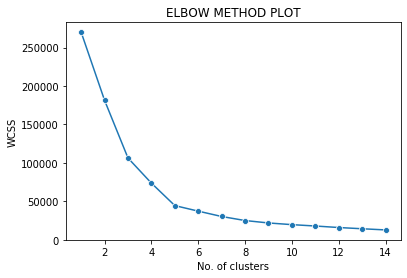

In [79]:
sns.lineplot(range(1,15), wcss, marker='o')
plt.title('ELBOW METHOD PLOT')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

In [80]:
teacher = KMeans(n_clusters= 5, init = 'k-means++', random_state=42)

In [81]:
learner = teacher.fit(X)

In [82]:
Y = learner.predict(X)
Y

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

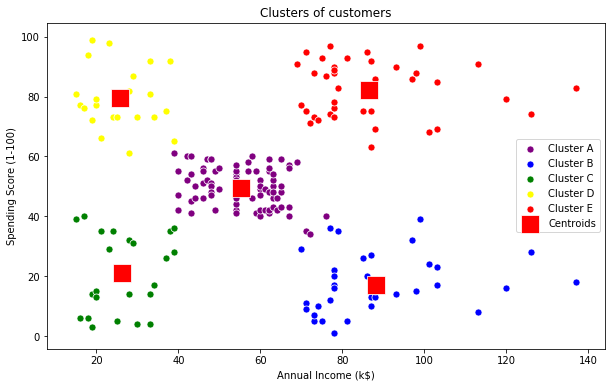

In [87]:
X = np.array(X)
plt.figure(figsize=(10,6))
sns.scatterplot(X[Y == 0, 0], X[Y == 0, 1], color = 'purple', label = 'Cluster A',s=50)
sns.scatterplot(X[Y == 1, 0], X[Y == 1, 1], color = 'blue', label = 'Cluster B',s=50)
sns.scatterplot(X[Y == 2, 0], X[Y == 2, 1], color = 'green', label = 'Cluster C',s=50)
sns.scatterplot(X[Y == 3, 0], X[Y == 3, 1], color = 'yellow', label = 'Cluster D',s=50)
sns.scatterplot(X[Y == 4, 0], X[Y == 4, 1], color = 'red', label = 'Cluster E',s=50)
sns.scatterplot(teacher.cluster_centers_[:, 0], teacher.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()